# 모두를 위한 딥러닝 lab7_2

### MNIST dataset으로 실습해보기

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


##### Reading data and set variables

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
nb_classes = 10

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
# image of shape 28*28 = 784
X = tf.placeholder(tf.float32,[None,784])
# 0~9 digits
Y = tf.placeholder(tf.float32,[None,nb_classes])

In [4]:
W = tf.Variable(tf.random_normal([784,nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

##### Softmax

In [5]:
hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

In [6]:
# Test model and get accuracy
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

##### Training epoch/batch

In [7]:
training_epochs = 25
batch_size = 100

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,train], feed_dict={X: batch_xs, Y: batch_ys})
        avg_cost += c / total_batch

    print('Epoch: ','%04d' % (epoch+1), 'cost = ', '{:.9f}'.format(avg_cost))

Epoch:  0001 cost =  2.744400355
Epoch:  0002 cost =  1.096664202
Epoch:  0003 cost =  0.879102061
Epoch:  0004 cost =  0.771540259
Epoch:  0005 cost =  0.701789532
Epoch:  0006 cost =  0.651648811
Epoch:  0007 cost =  0.613270742
Epoch:  0008 cost =  0.583205956
Epoch:  0009 cost =  0.558250756
Epoch:  0010 cost =  0.536350318
Epoch:  0011 cost =  0.518617485
Epoch:  0012 cost =  0.502689476
Epoch:  0013 cost =  0.488824651
Epoch:  0014 cost =  0.476147394
Epoch:  0015 cost =  0.465193769
Epoch:  0016 cost =  0.455096812
Epoch:  0017 cost =  0.445942085
Epoch:  0018 cost =  0.437288450
Epoch:  0019 cost =  0.429696880
Epoch:  0020 cost =  0.422374462
Epoch:  0021 cost =  0.415874810
Epoch:  0022 cost =  0.409849068
Epoch:  0023 cost =  0.404168734
Epoch:  0024 cost =  0.398802276
Epoch:  0025 cost =  0.393690945


#####  Prediction test & Visualize image

In [9]:
import matplotlib.pyplot as plt
import random

In [10]:
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction: ",sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[r:r+1]}))

Label:  [5]
Prediction:  [5]


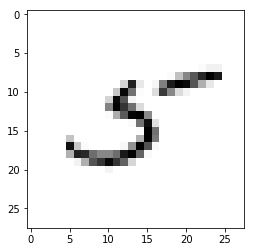

In [11]:
plt.imshow(mnist.test.images[r:r+1].reshape(28,28), cmap='Greys', interpolation='nearest')
plt.show()